In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [24]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [25]:
data.shape

(30, 17)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [27]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [28]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [29]:
# no null value present in this dataset
# do not have to much deviation 
# do not have to much diffrence b/w one quantile to another quantile

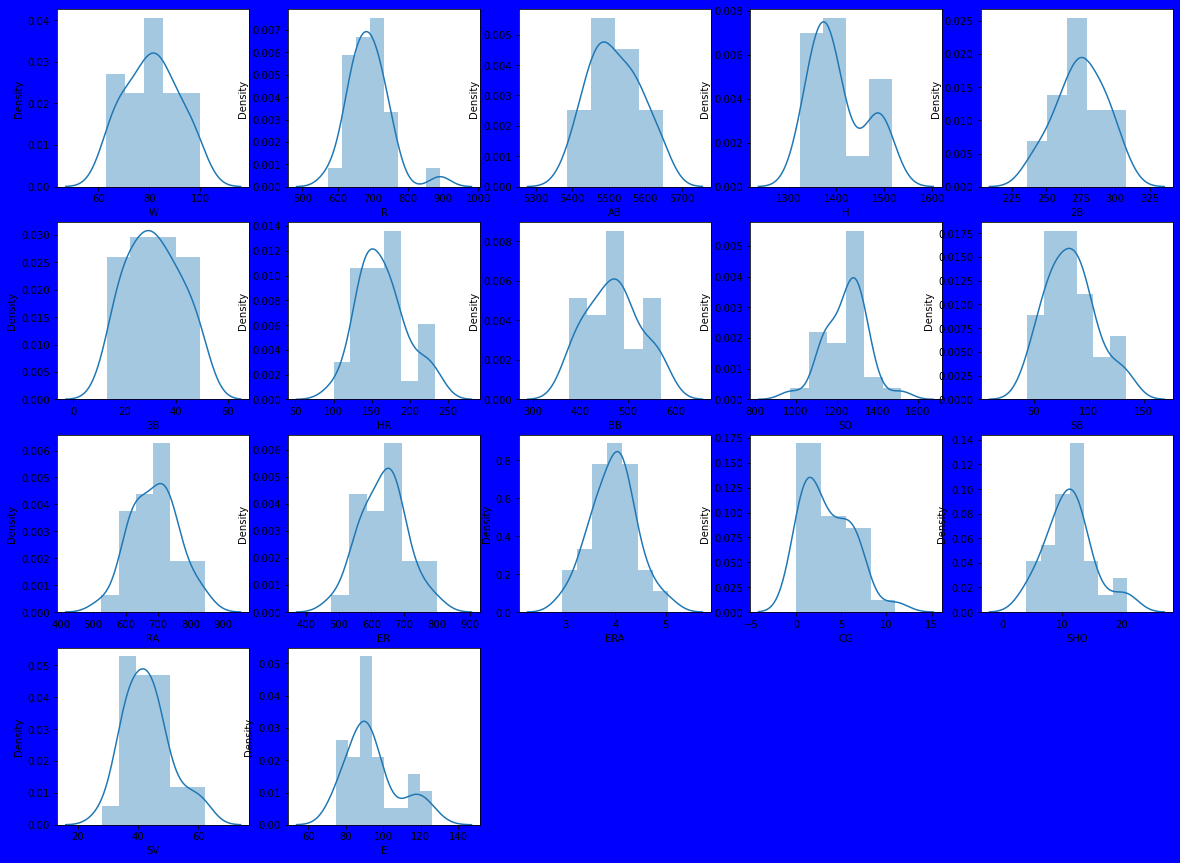

In [30]:
plt.figure(figsize = [20,15], facecolor = 'b')
plotnumber = 1

for column in data:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
    
plt.show()    

In [31]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

In [32]:
iqr = q3-q1

In [33]:
r_low = (q1.R-(1.5*iqr.R))
print(r_low)
index = np.where(data['R']<r_low)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

550.75
(30, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [34]:
r_high = (q3.R+(1.5*iqr.R))
print(r_high)
index = np.where(data['R']>r_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

818.75
(29, 17)


,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


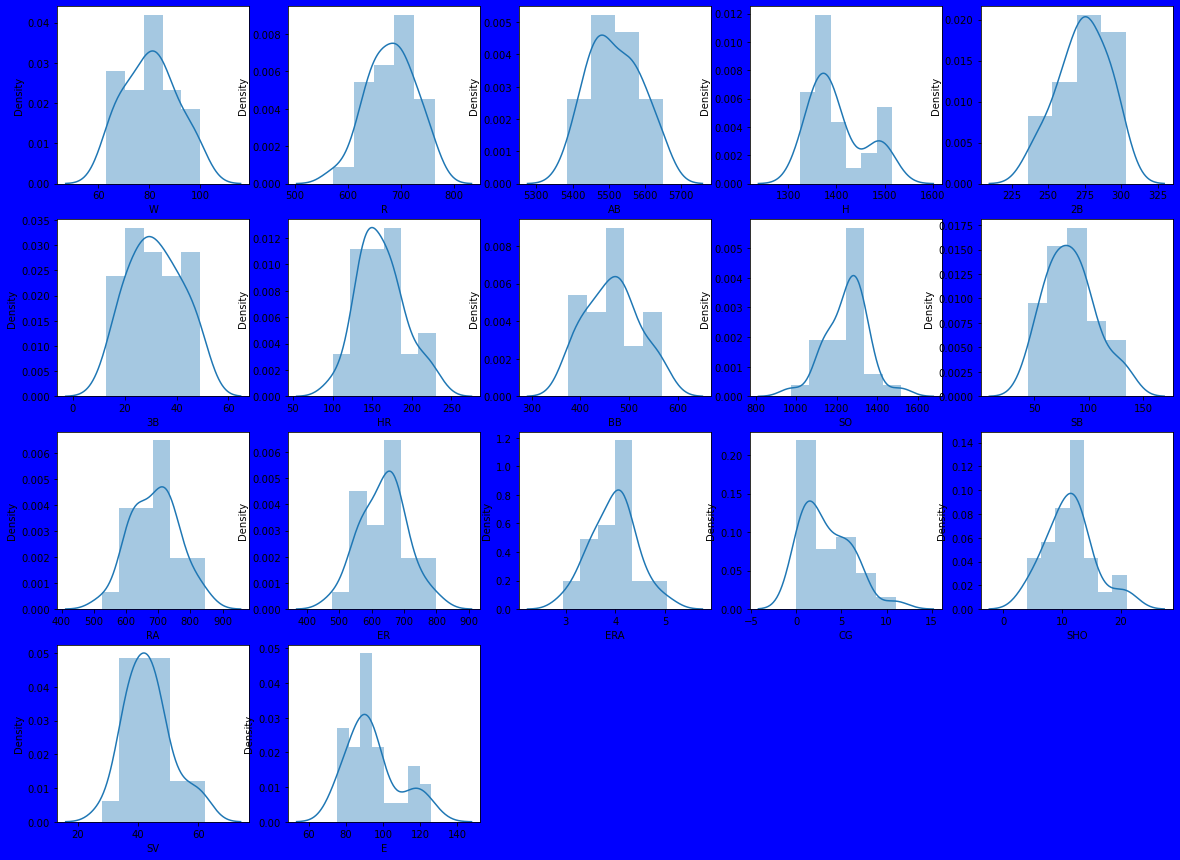

In [35]:
plt.figure(figsize = [20,15], facecolor = 'b')
plotnumber = 1

for column in data:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
    
plt.show()    

In [36]:
x = data.drop(columns = ['W'])
y = data.W

In [37]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [38]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

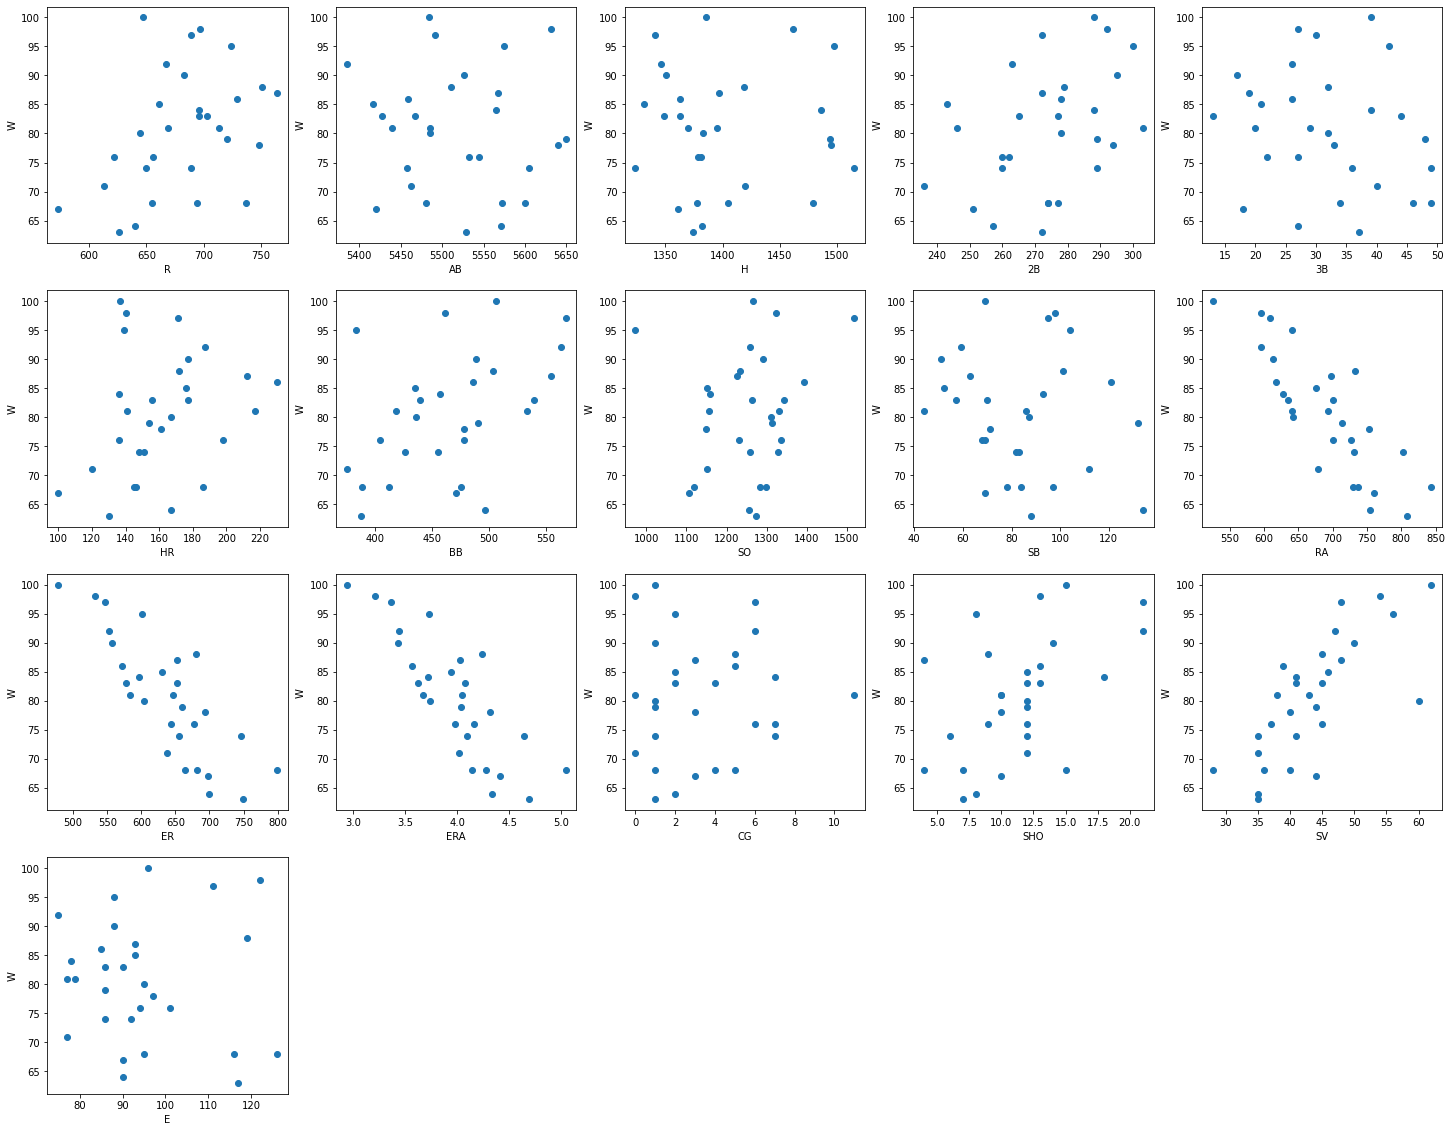

In [46]:
plt.figure(figsize = [25,20])
plotnumber = 1

for column in x:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('W',fontsize=10)
    plotnumber+=1
    
plt.show()    

In [48]:
data = data.drop(columns = ['RA'])
data = data.drop(columns = ['ER'])
data = data.drop(columns = ['ERA'])

In [49]:
data.head

<bound method NDFrame.head of       W    R    AB     H   2B  3B   HR   BB    SO   SB  CG  SHO  SV    E
0    95  724  5575  1497  300  42  139  383   973  104   2    8  56   88
1    83  696  5467  1349  277  44  156  439  1264   70   2   12  45   86
2    81  669  5439  1395  303  29  141  533  1157   86  11   10  38   79
3    76  622  5533  1381  260  27  136  404  1231   68   7    9  37  101
4    74  689  5605  1515  289  49  151  455  1259   83   7   12  35   86
6    87  764  5567  1397  272  19  212  554  1227   63   3    4  48   93
7    81  713  5485  1370  246  20  217  418  1331   44   0   10  43   77
8    80  644  5485  1383  278  32  167  436  1310   87   1   12  60   95
9    78  748  5640  1495  294  33  161  478  1148   71   3   10  40   97
10   88  751  5511  1419  279  32  172  503  1233  101   5    9  45  119
11   86  729  5459  1363  278  26  230  486  1392  121   5   13  39   85
12   85  661  5417  1331  243  21  176  435  1150   52   2   12  46   93
13   76  656  5544  1

In [53]:
x = data.drop(columns = ['W'])
y = data.W

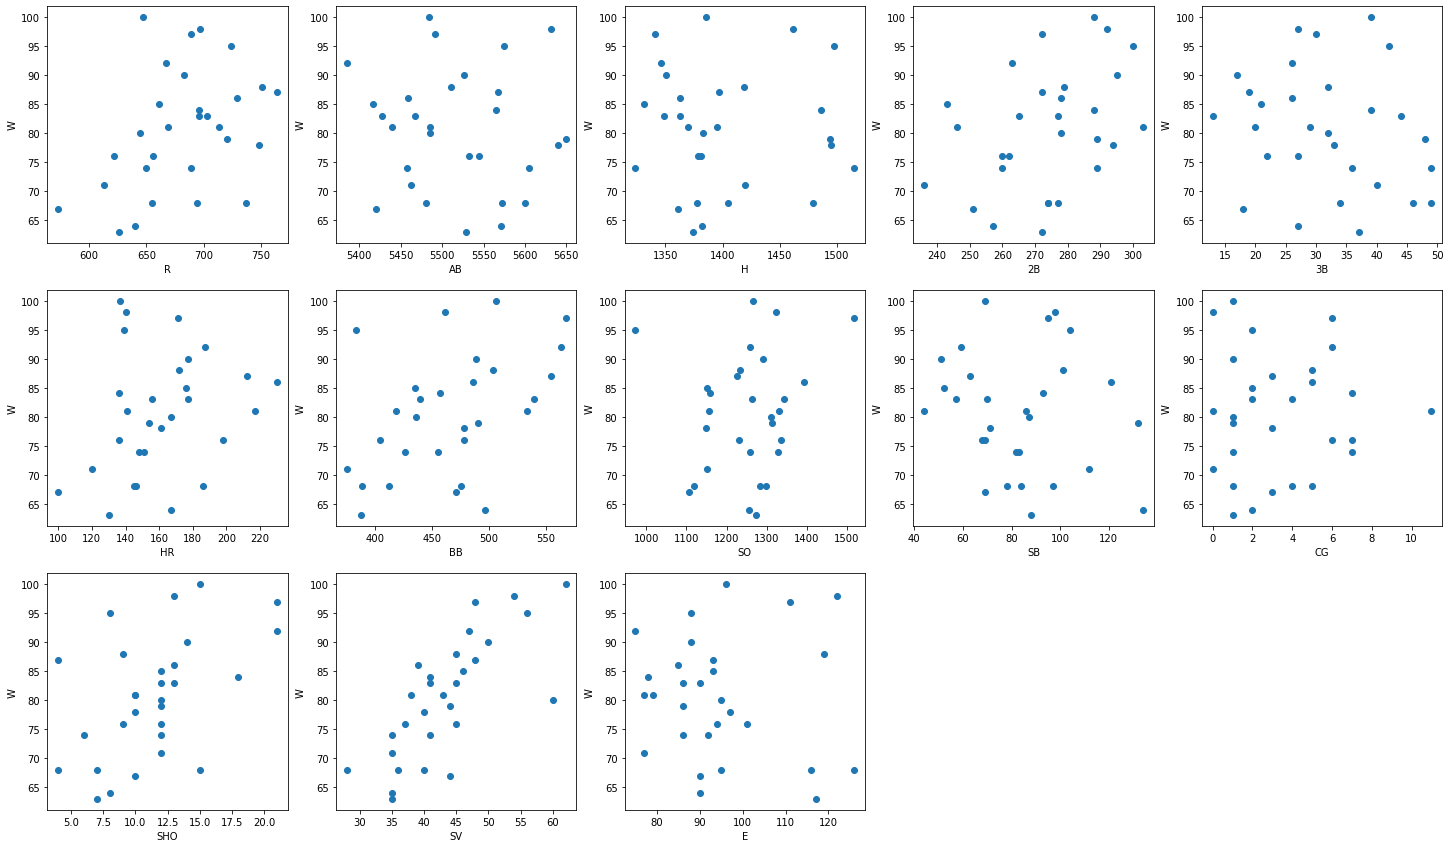

In [54]:
plt.figure(figsize = [25,20])
plotnumber = 1

for column in x:
    if plotnumber <= 20:
        ax = plt.subplot(4,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('W',fontsize=10)
    plotnumber+=1
    
plt.show()    

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [55]:
x_scaled = scaler.fit_transform(x)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 79)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()

In [60]:
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
data.head(1)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88


In [64]:
print('chance of winner :',lr.predict(scaler.transform([[724,5575,1497,300,42,139,383,973,104,2,8,56,88]])))

chance of winner : [95.8517186]


In [65]:
lr.score(x_train,y_train)

0.943318793418897

In [66]:
lr.score(x_test,y_test)

0.636347223779941

In [67]:
y_pred = lr.predict(x_test)
y_pred

array([66.57712767, 74.88400873, 83.93521866, 98.50311582, 95.6522582 ,
       95.8517186 , 81.45439015, 69.59304006])

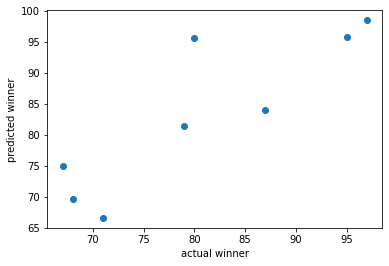

In [68]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual winner')
plt.ylabel('predicted winner')
plt.show()

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [72]:
 mean_absolute_error(y_test,y_pred)

4.678273153569485

In [75]:
mean_squared_error(y_test,y_pred)

43.45650675829704

In [74]:
np.sqrt(mean_squared_error(y_test,y_pred))

6.592154940404317